In [1]:
pip install turicreate

     |████████████████████████████████| 91.2MB 39.8MB/s eta 0:00:01
     |████████████████████████████████| 17.3MB 18.3MB/s eta 0:00:01█████████████████▎            | 10.5MB 18.3MB/s eta 0:00:01
     |████████████████████████████████| 421.8MB 93kB/s s eta 0:00:01                        | 43.5MB 41.8MB/s eta 0:00:10��        | 311.0MB 42.3MB/s eta 0:00:03��███▌    | 362.3MB 43.5MB/s eta 0:00:02
     |████████████████████████████████| 3.4MB 32.8MB/s eta 0:00:01:01
     |████████████████████████████████| 327kB 37.9MB/s eta 0:00:01
     |████████████████████████████████| 3.8MB 35.9MB/s eta 0:00:01                            | 266kB 35.9MB/s eta 0:00:01
     |████████████████████████████████| 51kB 15.9MB/s eta 0:00:01
     |████████████████████████████████| 450kB 36.5MB/s eta 0:00:01
     |████████████████████████████████| 51kB 17.1MB/s eta 0:00:01
     |████████████████████████████████| 61kB 18.0MB/s eta 0:00:01
     |████████████████████████████████| 71kB 18.1MB/s eta 0:00:01
     |██████

In [2]:
import turicreate as tc

In [45]:
pip install -e git+https://github.com/Kagandi/turicreate-cross-validation.git#egg=turicreate_cross_validation

Obtaining turicreate_cross_validation from git+https://github.com/Kagandi/turicreate-cross-validation.git#egg=turicreate_cross_validation
  Updating ./src/turicreate-cross-validation clone
  Running command git fetch -q --tags
  Running command git reset --hard -q dabf3b7d9d35de767945cc0f3dc6448c2c9b3dc1
  Found existing installation: turicreate-cross-validation 0.1
    Uninstalling turicreate-cross-validation-0.1:
      Successfully uninstalled turicreate-cross-validation-0.1
  Running setup.py develop for turicreate-cross-validation
Note: you may need to restart the kernel to use updated packages.


In [7]:
sales = tc.SFrame('home_data.sframe')
sales = sales.sort(['sqft_living','price'])

In [12]:
l2_small_penalty = 1.5e-5

In [6]:
def polynomial_sframe(feature, degree):
    poly_sframe = tc.SFrame()
    poly_sframe['power_1'] = feature
    if degree >1:
        for power in range(2,degree+1):
            name = 'power_' + str(power)
            poly_sframe[name] = feature ** power
    return poly_sframe

In [13]:
poly15_data = polynomial_sframe(sales['sqft_living'],15) 
poly15_features = poly15_data.column_names()
poly15_data['price'] = sales['price']
model1 = tc.linear_regression.create(poly15_data, target = 'price', 
                                           features = poly15_features, l2_penalty=l2_small_penalty,
                                           validation_set=None,verbose=False)

In [22]:
import matplotlib.pyplot as plt

In [15]:
model1.coefficients

name,index,value,stderr
(intercept),None,156896.99419054913,593233.925064029
power_1,None,137.4123393720249,2949.552531914387
power_2,None,0.09434562016410637,6.079784166207243
power_3,None,-0.00010600650738652577,0.006873971913747484
power_4,None,4.504953813035665e-08,4.7597409263019935e-06
power_5,None,-6.81277502900447e-12,2.130392145068443e-09
power_6,None,1.4634083805966735e-16,6.313487120131142e-13
power_7,None,3.805449879751694e-20,1.2388387497303537e-16
power_8,None,-2.1542720688753106e-25,1.561419003413383e-20
power_9,None,-1.8479535479032349e-28,1.1353996017107862e-24


In [16]:
(semi_split1, semi_split2) = sales.random_split(.5,seed=0)
(set_1, set_2) = semi_split1.random_split(0.5, seed=0)
(set_3, set_4) = semi_split2.random_split(0.5, seed=0)

In [18]:
def get_poly_model(set_data, l2_penalty):
    poly15_data = polynomial_sframe(set_data['sqft_living'], 15)
    poly15_features = poly15_data.column_names() 
    poly15_data['price'] = set_data['price'] 
    model15 = tc.linear_regression.create(poly15_data, target = 'price', features = poly15_features, 
                                                l2_penalty=l2_penalty,
                                                validation_set=None,verbose=False)
    return poly15_data, model15

In [23]:
def plot_fitted_line(set_data, l2_penalty):
    poly15_data, model15 = get_poly_model(set_data, l2_penalty)
    return plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
           poly15_data['power_1'], model15.predict(poly15_data),'-')

In [20]:
l2_small_penalty = 1e-9

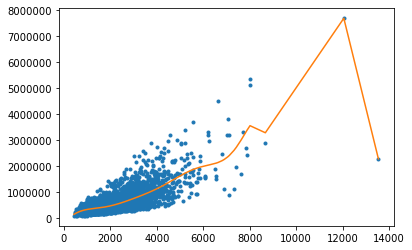

In [24]:
poly15_data, model15 = get_poly_model(set_1, l2_small_penalty)
plot_fitted_line(set_1, l2_small_penalty)

In [25]:
model15.coefficients

name,index,value,stderr
(intercept),None,-160126.25843414082,1254226.9401576216
power_1,None,798.699979398853,5666.365876439566
power_2,None,0.02253079204195198,10.497498016171608
power_3,None,-0.0008349939364979876,0.010543773633793397
power_4,None,7.4339586349679e-07,6.391447167936122e-06
power_5,None,-2.927301447904631e-10,2.455819534859507e-09
power_6,None,5.827116669717483e-14,6.085970137601195e-13
power_7,None,-4.93125942616408e-18,9.684479569766206e-17
power_8,None,-8.110446776324501e-23,1.0004737039320913e-20
power_9,None,3.0288535390526414e-26,9.072792097537936e-25


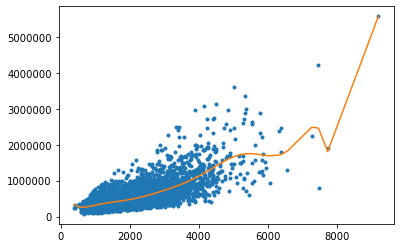

In [26]:
poly15_data, model15 = get_poly_model(set_2, l2_small_penalty)
plot_fitted_line(set_2, l2_small_penalty)

In [27]:
model15.coefficients

name,index,value,stderr
(intercept),None,1176600.589468825,nan
power_1,None,-4232.713924824926,nan
power_2,None,7.3612720161258425,nan
power_3,None,-0.006194969961145849,nan
power_4,None,2.7762110160333777e-06,nan
power_5,None,-6.019627050081868e-10,nan
power_6,None,1.8590536359452254e-14,nan
power_7,None,1.6760589508490798e-17,nan
power_8,None,-2.2636625669216505e-21,nan
power_9,None,-1.361346281994256e-25,1.4993744095193947e-23


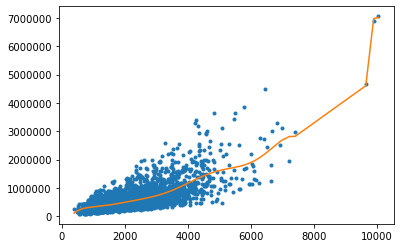

In [28]:
poly15_data, model15 = get_poly_model(set_3, l2_small_penalty)
plot_fitted_line(set_3, l2_small_penalty)

In [29]:
model15.coefficients

name,index,value,stderr
(intercept),None,-592338.3076390345,4185254.845629533
power_1,None,2946.3803801277863,22622.435524744393
power_2,None,-3.814638121315179,50.56034750720934
power_3,None,0.0023783419835335267,0.06189401622207703
power_4,None,-5.675577512692554e-07,4.6201136069689974e-05
power_5,None,-8.855081103998853e-11,2.201871390423458e-08
power_6,None,8.087466336261304e-14,6.7361957392473196e-12
power_7,None,-1.6297079573568653e-17,1.2567500053807474e-15
power_8,None,7.123413925778991e-22,1.1058171244711876e-19
power_9,None,1.4540633678364276e-25,nan


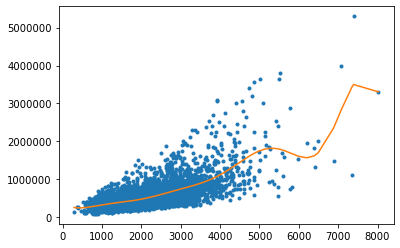

In [30]:
poly15_data, model15 = get_poly_model(set_4, l2_small_penalty)
plot_fitted_line(set_4, l2_small_penalty)

In [31]:
model15.coefficients

name,index,value,stderr
(intercept),None,385268.25428296975,2010577.3146588171
power_1,None,-775.0497252760507,13557.035745078892
power_2,None,1.2295253060872153,37.6504753202762
power_3,None,-0.0002656294544649615,0.0575017881402502
power_4,None,-7.208286084961271e-07,5.431045439026758e-05
power_5,None,6.903839870356669e-10,3.371566812662537e-08
power_6,None,-2.627735631149133e-13,1.4236010990766254e-11
power_7,None,4.2868280095476466e-17,4.172584023171343e-15
power_8,None,-2.2655166560538435e-22,8.620352452999245e-19
power_9,None,-7.191880284703466e-25,1.2671254378235344e-22


In [32]:
l2_large_penalty = 1.23e2

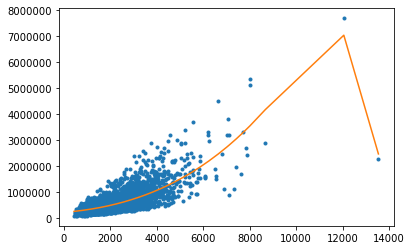

In [33]:
poly15_data, model15 = get_poly_model(set_1, l2_large_penalty)
plot_fitted_line(set_1, l2_large_penalty)

In [34]:
model15.coefficients

name,index,value,stderr
(intercept),None,216957.08928561106,1267269.5394604164
power_1,None,74.22291916459969,5725.289933373108
power_2,None,0.027254256714060635,10.606660605431253
power_3,None,1.7859653301341316e-06,0.010653417439265837
power_4,None,1.482840745700762e-11,6.457911283565704e-06
power_5,None,-5.190679080806644e-16,2.481357393382242e-09
power_6,None,4.733865126622992e-20,6.149257623567276e-13
power_7,None,8.367021877088358e-24,9.78518764933328e-17
power_8,None,6.220569168821434e-28,1.0108775449082142e-20
power_9,None,2.469953059590829e-32,9.167139291093575e-25


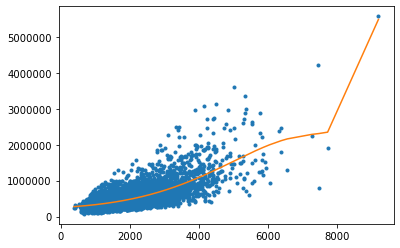

In [35]:
poly15_data, model15 = get_poly_model(set_2, l2_large_penalty)
plot_fitted_line(set_2, l2_large_penalty)

In [36]:
model15.coefficients

name,index,value,stderr
(intercept),None,254573.06135921247,nan
power_1,None,49.72364380030007,nan
power_2,None,0.022804636066076762,nan
power_3,None,4.03562205494158e-06,nan
power_4,None,2.314689562894618e-10,nan
power_5,None,-1.7444085740363872e-14,nan
power_6,None,-4.594695876114542e-18,nan
power_7,None,-5.238782412845874e-22,nan
power_8,None,-4.3065250983966654e-26,nan
power_9,None,-2.573770726835678e-30,1.507646148286226e-23


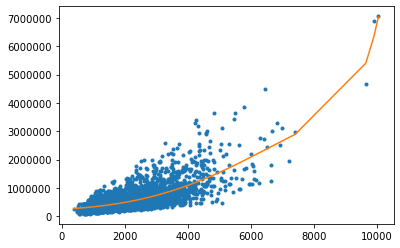

In [37]:
poly15_data, model15 = get_poly_model(set_2, l2_large_penalty)
plot_fitted_line(set_3, l2_large_penalty)

In [38]:
model15.coefficients

name,index,value,stderr
(intercept),None,254573.06135921247,nan
power_1,None,49.72364380030007,nan
power_2,None,0.022804636066076762,nan
power_3,None,4.03562205494158e-06,nan
power_4,None,2.314689562894618e-10,nan
power_5,None,-1.7444085740363872e-14,nan
power_6,None,-4.594695876114542e-18,nan
power_7,None,-5.238782412845874e-22,nan
power_8,None,-4.3065250983966654e-26,nan
power_9,None,-2.573770726835678e-30,1.507646148286226e-23


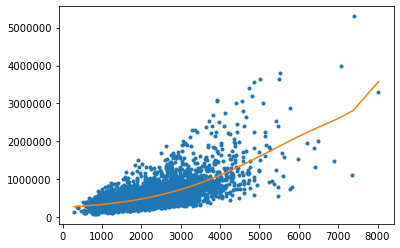

In [39]:
poly15_data, model15 = get_poly_model(set_4, l2_large_penalty)
plot_fitted_line(set_4, l2_large_penalty)

In [40]:
model15.coefficients

name,index,value,stderr
(intercept),None,258364.79445265347,2026469.4715239233
power_1,None,48.25026724696611,13664.194289600324
power_2,None,0.021421536200911202,37.9480750472169
power_3,None,4.081343673785803e-06,0.05795629811133481
power_4,None,3.3744050997892124e-10,5.473973918040847e-05
power_5,None,-2.4336676005855963e-15,3.398216605374991e-08
power_6,None,-4.2132277869130635e-18,1.4348536342638646e-11
power_7,None,-6.610449092626544e-22,4.2055652765385275e-15
power_8,None,-6.79098632879295e-26,8.68849009307742e-19
power_9,None,-4.832915493299912e-30,1.277141146286392e-22


In [48]:
(train_valid, test) = sales.random_split(.9, seed=1)

In [51]:
import pandas as pd

In [58]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype = dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype = dtype_dict)

In [57]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [61]:
n = len(train_valid_shuffled)
k = 10 
for i in range(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1    
    print(i, (start, end))

0 (0.0, 1938.6)
1 (1939.6, 3878.2)
2 (3879.2, 5817.8)
3 (5818.8, 7757.4)
4 (7758.4, 9697.0)
5 (9698.0, 11636.6)
6 (11637.6, 13576.2)
7 (13577.2, 15515.8)
8 (15516.8, 17455.4)
9 (17456.4, 19395.0)


In [62]:
train_valid_shuffled[0:10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2780400035,20140505T000000,665000.0,4.0,2.50,2800.0,5900,1.0,0,0,...,8,1660,1140,1963,0,98115,47.6809,-122.286,2580.0,5900.0
1,1703050500,20150321T000000,645000.0,3.0,2.50,2490.0,5978,2.0,0,0,...,9,2490,0,2003,0,98074,47.6298,-122.022,2710.0,6629.0
2,5700002325,20140605T000000,640000.0,3.0,1.75,2340.0,4206,1.0,0,0,...,7,1170,1170,1917,0,98144,47.5759,-122.288,1360.0,4725.0
3,0475000510,20141118T000000,594000.0,3.0,1.00,1320.0,5000,1.0,0,0,...,7,1090,230,1920,0,98107,47.6674,-122.365,1700.0,5000.0
4,0844001052,20150128T000000,365000.0,4.0,2.50,1904.0,8200,2.0,0,0,...,7,1904,0,1999,0,98010,47.3107,-122.001,1560.0,12426.0
5,2781280290,20150427T000000,305000.0,3.0,2.50,1610.0,3516,2.0,0,0,...,8,1610,0,2006,0,98055,47.4491,-122.188,1610.0,3056.0
6,2214800630,20141105T000000,239950.0,3.0,2.25,1560.0,8280,2.0,0,0,...,7,1560,0,1979,0,98001,47.3393,-122.259,1920.0,8120.0
7,2114700540,20141021T000000,366000.0,3.0,2.50,1320.0,4320,1.0,0,0,...,6,660,660,1918,0,98106,47.5327,-122.347,1190.0,4200.0
8,2596400050,20140730T000000,375000.0,3.0,1.00,1960.0,7955,1.0,0,0,...,7,1260,700,1963,0,98177,47.7641,-122.364,1850.0,8219.0
9,4140900050,20150126T000000,440000.0,4.0,1.75,2180.0,10200,1.0,0,2,...,8,2000,180,1966,0,98028,47.7638,-122.270,2590.0,10445.0


In [63]:
print(len(train_valid_shuffled))

19396


In [64]:
validation4 = train_valid_shuffled[5818 : 7757]

In [65]:
print(int(round(validation4['price'].mean(), 0)))

536353


In [67]:
n = len(train_valid_shuffled)
first_two = train_valid_shuffled[0:2]
last_two = train_valid_shuffled[n-2:n]
print(first_two.append(last_two))

               id             date      price  bedrooms  bathrooms  \
0      2780400035  20140505T000000   665000.0       4.0       2.50   
1      1703050500  20150321T000000   645000.0       3.0       2.50   
19394  4139480190  20140916T000000  1153000.0       3.0       3.25   
19395  7237300290  20150326T000000   338000.0       5.0       2.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0           2800.0      5900     1.0           0     0  ...      8   
1           2490.0      5978     2.0           0     0  ...      9   
19394       3780.0     10623     1.0           0     1  ...     11   
19395       2400.0      4496     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1660           1140      1963             0    98115  47.6809   
1            2490              0      2003             0    98074  47.6298   
19394        2650           1130      1999             0    9800

In [68]:
first_part = train_valid_shuffled[0:5817]
last_part = train_valid_shuffled[7758:]
train4 = first_part.append(last_part)
print(len(train4))

17455


In [69]:
print(int(round(train4['price'].mean(), 0)))

539458


In [70]:
import numpy as np
def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list):    
    rss_sum = 0
    n = len(data)
    for i in range(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
        validation_set = data[start:end+1]
        training_set = data[0:start].append(data[end+1:n])    
        model = tc.linear_regression.create(training_set, target = output_name, features = features_list, 
                                                  l2_penalty=l2_penalty,
                                                  validation_set=None,verbose=False)
        predictions = model.predict(validation_set)
        residuals = validation_set['price'] - predictions
        rss = sum(residuals * residuals)
        rss_sum += rss
    validation_error = rss_sum / k 
    return validation_error

In [72]:
poly_data = polynomial_sframe(train_valid_shuffled['sqft_living'], 15)
my_features = poly_data.column_names()
poly_data['price'] = train_valid_shuffled['price']

val_err_dict = {}
for l2_penalty in np.logspace(1, 7, num=13):
    val_err = k_fold_cross_validation(10, l2_penalty, poly_data, 'price', my_features)    
    print(l2_penalty)
    val_err_dict[l2_penalty] = val_err
print(val_err_dict)

10.0
31.622776601683793
100.0
316.22776601683796
1000.0
3162.2776601683795
10000.0
31622.776601683792
100000.0
316227.7660168379
1000000.0
3162277.6601683795
10000000.0
{10.0: 491826363624306.2, 31.622776601683793: 287504187904045.1, 100.0: 160908949394675.88, 316.22776601683796: 122090962918678.22, 1000.0: 121192261750563.66, 3162.2776601683795: 123950006348421.22, 10000.0: 136837172535275.92, 31622.776601683792: 171728091942005.22, 100000.0: 229361429024951.8, 316227.7660168379: 252940567006593.0, 1000000.0: 258682546863133.7, 3162277.6601683795: 262819398218656.7, 10000000.0: 264889013875978.7}


In [73]:
import pprint 
pprint.pprint(val_err_dict)

{10.0: 491826363624306.2,
 31.622776601683793: 287504187904045.1,
 100.0: 160908949394675.88,
 316.22776601683796: 122090962918678.22,
 1000.0: 121192261750563.66,
 3162.2776601683795: 123950006348421.22,
 10000.0: 136837172535275.92,
 31622.776601683792: 171728091942005.22,
 100000.0: 229361429024951.8,
 316227.7660168379: 252940567006593.0,
 1000000.0: 258682546863133.7,
 3162277.6601683795: 262819398218656.7,
 10000000.0: 264889013875978.7}


In [74]:
print(min(val_err_dict.items(), key=lambda x: x[1]))

(1000.0, 121192261750563.66)


In [77]:
print(min(val_err_dict, key=val_err_dict.get))

1000.0


In [80]:
l2_penalty = tc.SArray(val_err_dict.keys())
validation_error = tc.SArray(val_err_dict.values())

sf = tc.SFrame({'l2_penalty':l2_penalty,'validation_error':validation_error})
print(sf)

+--------------------+--------------------+
|     l2_penalty     |  validation_error  |
+--------------------+--------------------+
|        10.0        | 491826363624306.2  |
| 31.622776601683793 | 287504187904045.1  |
|       100.0        | 160908949394675.88 |
| 316.22776601683796 | 122090962918678.22 |
|       1000.0       | 121192261750563.66 |
| 3162.2776601683795 | 123950006348421.22 |
|      10000.0       | 136837172535275.92 |
| 31622.776601683792 | 171728091942005.22 |
|      100000.0      | 229361429024951.8  |
| 316227.7660168379  | 252940567006593.0  |
+--------------------+--------------------+
[13 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


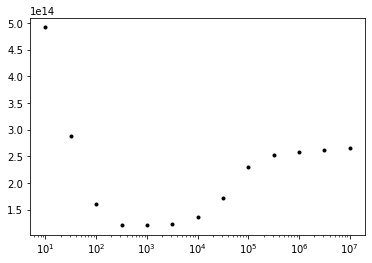

In [81]:
plt.plot(sf['l2_penalty'],sf['validation_error'],'k.')
plt.xscale('log')

In [82]:
poly_data = polynomial_sframe(train_valid_shuffled['sqft_living'], 15)
features_list = poly_data.column_names()
poly_data['price'] = train_valid_shuffled['price']
l2_penalty_best = 1000.0

model = tc.linear_regression.create(poly_data, target='price',
                                         features=features_list,
                                         l2_penalty=l2_penalty_best,
                                         validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 19396

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.069976     | 2461779.019227     | 248914.004079                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [86]:
poly_test = polynomial_sframe(test['sqft_living'], 15)
predictions = model.predict(poly_test)
errors = predictions - test['price']
rss = (errors*errors)
sum1 = rss.sum()

In [87]:
sum1

array('d', [230291756031400.12, 129301351635889.55, 396970784896126.94, 179736025302348.9, 324148683059551.8, 134415122400367.38, 156784298358250.0, 188413666590626.16, 187053165845088.3, 372258762622325.44, 147780551363514.7, 171714960924058.47, 372883115300338.6, 270588831671134.06, 170563381511656.0, 326705784966175.8, 333378273217492.0, 147442008159383.22, 275160067480067.94, 228407033331926.66, 130096324107335.89, 361264944502444.44, 138438865920622.03, 156784298358250.0, 190763589498745.84, 223772821583242.8, 190689727593772.16, 280874892888133.34, 401031058704810.9, 254291836425082.56, 238008006829294.3, 253240842075345.8, 210535286337191.34, 151169218161408.8, 289071925266922.3, 130006858320560.1, 317630021310867.94, 225151445857847.94, 581085673456450.6, 220594829109164.1, 132759451102071.22, 140550404368779.39, 212672260961533.25, 334809109857445.94, 324148683059551.8, 2123606507637278.2, 406199905730653.6, 194437139342456.03, 234222464751565.78, 129301351635889.55, 262792467